- title: Projet d'Optimisation Combinatoire
- author: Thomas Dargent
- date: 2020-06-23
- slug: comb
- tags: python, jupyter, optimization, combinatoire, recursion
- summary: This is a project I had to do during my master 1 year

# Projet d’évaluation confiné
Vidéo associée : https://ent.normandie-univ.fr/filex/get?k=rIhZVHf7vwyGnv2TZNz
## Exercice 2

In [1]:
import numpy as np

str1 = "AGATGCT"
str2 = "AGTATC"

### Version Récursive
On commence par la réalisation intuitive d'une version récursive. On distingue les trois cas suivants:

|         | Insertion| Deletion     | Substitution |
| --------| ---------| ------------ | ------------ |
| Chaine 1| AT       | TAT           | AAT          |
| Chaine 2| TAT      | AT           | TAT          |  
| Resultat| <span style='color:green'>**T**</span>AT| <span style='color:red'>~T~</span>AT| <span style='color:blue'>**T**</span>AT |

On note également que "ne rien faire" peut être vu comme substituer des lettres identiques, dans ce cas on choisi de prendre un coût nul.

In [11]:
def EditDistanceStrings(str1, str2, csub=1, cins=1, cdel=1):
    # Si la sous chaine est vide,
    if not str1:  # On insert les caracteres restant de l'autre chaine
        return len(str2)*cins
    if not str2:  # Ou on supprime ceux de la chaine
        return len(str1)*cdel

    need_to_sub = (str1[0] != str2[0])
    costs = [
        EditDistanceStrings(str1[1:], str2, csub, cins, cdel) + cdel,
        EditDistanceStrings(str1, str2[1:], csub, cins, cdel) + cins,
        EditDistanceStrings(str1[1:], str2[1:], csub, cins, cdel) + csub*need_to_sub
    ]
    return min(costs)

assert EditDistanceStrings(str1, str2) == 3
assert EditDistanceStrings("chiens", "niche") == 5

Comme son résultat sur les chaines `AGATGCT` et `AGTATC` est bien égal à trois, on peux passer à la suite.

### Avec memoisation

On enregistre juste les résultats au fur et à mesure de l'entrainement, et on ne recalcule pas des résultats déja calculés. On note des résultats inconnus par '-1' comme une distance est toujours positive ou nulle.

In [31]:
def EditDistanceStrings(str1, str2, csub=1, cins=1, cdel=1):
    i = len(str1)
    j = len(str2)
    if dp[i, j] >= 0:
        return dp[i, j]

    need_to_sub = (str1[0] != str2[0])
    costs = [
        EditDistanceStrings(str1, str2[1:], csub, cins, cdel) + cins,
        EditDistanceStrings(str1[1:], str2, csub, cins, cdel) + cdel,
        EditDistanceStrings(str1[1:], str2[1:], csub, cins, cdel) + csub*need_to_sub
    ]
    #print('IDS'[costs.index(min(costs))], (i, j),str1, str2, ":", costs)
    dp[i, j] = min(costs)
    return min(costs)

def init_dp(str1, str2):
    dp = np.zeros((len(str1)+1, len(str2)+1))
    dp[0, :] = np.array(range(len(str2)+1))
    dp[:, 0] = np.array(range(len(str1)+1))
    dp[1:, 1:] = -1
    return dp

dp = init_dp(str1, str2)
print(dp)
assert EditDistanceStrings(str1, str2) == 3
print(dp)
dp = init_dp("chiens", "niche")
assert EditDistanceStrings("chiens", "niche") == 5,EditDistanceStrings("chiens", "niche") 

[[ 0.  1.  2.  3.  4.  5.  6.]
 [ 1. -1. -1. -1. -1. -1. -1.]
 [ 2. -1. -1. -1. -1. -1. -1.]
 [ 3. -1. -1. -1. -1. -1. -1.]
 [ 4. -1. -1. -1. -1. -1. -1.]
 [ 5. -1. -1. -1. -1. -1. -1.]
 [ 6. -1. -1. -1. -1. -1. -1.]
 [ 7. -1. -1. -1. -1. -1. -1.]]
[[0. 1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 2. 3. 4. 5.]
 [2. 1. 2. 2. 3. 4. 5.]
 [3. 2. 2. 3. 3. 3. 4.]
 [4. 3. 2. 3. 3. 4. 4.]
 [5. 4. 3. 2. 3. 4. 4.]
 [6. 5. 4. 3. 3. 3. 4.]
 [7. 6. 5. 4. 4. 4. 3.]]


### Version Bottom Up:
On va maintenant parcourir notre tableau de memoisation dp dans un ordre topologique : Tout nos recherche dans ce tableau auront été calculée au préalable. On enleve donc les '-1' de l'initialisation.

In [38]:
def EditDistanceStrings(str1, str2, csub=1, cins=1, cdel=1, verbose=False):
    dp = np.zeros((len(str1)+1, len(str2)+1))
    dp[0, :] = np.array(range(len(str2)+1)) * cins
    dp[:, 0] = np.array(range(len(str1)+1)) * cdel
    
    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            need_to_sub = (str1[i-1] != str2[j-1])
            costs = [
                dp[i, j-1] + cins,
                dp[i-1, j] + cdel,
                dp[i-1, j-1] + csub*need_to_sub
            ]
            if verbose:
                print('IDS'[costs.index(min(costs))], (i, j),str1, str2, ":", costs)
            dp[i, j] = min(costs)
            
    if verbose:
        print(dp)
    return dp[-1,-1]

assert EditDistanceStrings(str1, str2) == 3, EditDistanceStrings(str1, str2, verbose=True)
assert EditDistanceStrings("chiens", "niche") == 5, EditDistanceStrings("chiens", "niche")

## Chemin d'édition

On choisi de construire les chemins comment un tableau de chemins optimaux construit récursivement. Cela signifie que pour toute distance `dp[i,j]` on a un objet pointers correspondant dans `parent_pointers[i,j]`. Cet objet à pour champ `next` l'ensemble des opération parentes optimales, et leurs paramètres associés.

In [53]:
from collections import namedtuple

pointers = namedtuple("Op", "operation, cost, parameters, next")

def EditDistanceStrings(str1, str2, csub=1, cins=1, cdel=1, output_path=False, verbose=False):
    # On traite nos parametres comme des chaines même s'il s'agit d'autre
    # chose: nombres etc... ce sera utile plus tard.
    str1 = str(str1)
    str2 = str(str2)
    
    dp = np.zeros((len(str1)+1, len(str2)+1))
    dp[0, :] = np.array(range(len(str2)+1)) * cins
    dp[:, 0] = np.array(range(len(str1)+1)) * cdel
    
    if output_path:
        parent_pointers = [
            [None for j in range(len(str2)+1)]
            for i in range(len(str1)+1)
        ]
    

    for i in range(0, len(str1)+1):
        for j in range(0, len(str2)+1):
            if i == 0 and j == 0:
                # Si on a deux chaines vides, il n'ya pas d'opération parente
                # On laisse le parent_pointer à None
                continue
            if i == 0 or j == 0:
                if output_path:
                    # Initialise les opérations antérieures des cas de bases 
                    # Celles si dépendent du cas: tout à inserer ou tout a 
                    # supprimer.
                    n = parent_pointers[i - (i != 0)][j - (j != 0)]
                    parent_pointers[i][j] = pointers(
                        operation='D' if (i != 0) else 'I',
                        cost=cdel if (i != 0) else cins,
                        parameters=(str1[i-1], str2[j-1]),
                        next=n
                    )
                continue

            
            need_to_sub = (str1[i-1] != str2[j-1])
            # On stocke les parametres des possibles opérations ici, pour
            # ne pas les calculer plusieurs fois.
            operations = 'IDS'
            costs = [cins, cdel, csub*need_to_sub]
            subpbs = [(i, j-1), (i-1, j), (i-1, j-1)]
            
            total_costs = [dp[sub] + cost for sub, cost in zip(subpbs, costs)]
            dp[i, j] = min(total_costs)
            
            if output_path:
                op = total_costs.index(min(total_costs))
                parent_pointers[i][j] = pointers(
                    operation=operations[op],
                    cost=costs[op],
                    parameters=(str1[i-1], str2[j-1]),
                    next=parent_pointers[subpbs[op][0]][subpbs[op][1]]
                )
    if verbose:
        print(dp)
    if output_path:
        return dp[-1,-1], parent_pointers[-1][-1]
    return dp[-1,-1]
    
dist, parent_pointers = EditDistanceStrings(str1, str2, output_path=True)
print("Valeurs de la distance d'édition:")
print(dist)
print("Chemin d'édition:")
print(parent_pointers)

assert dist == 3
assert EditDistanceStrings("chiens", "niche") == 5

Valeurs de la distance d'édition:
3.0
Chemin d'édition:
Op(operation='D', cost=1, parameters=('T', 'C'), next=Op(operation='S', cost=0, parameters=('C', 'C'), next=Op(operation='D', cost=1, parameters=('G', 'T'), next=Op(operation='S', cost=0, parameters=('T', 'T'), next=Op(operation='S', cost=0, parameters=('A', 'A'), next=Op(operation='I', cost=1, parameters=('G', 'T'), next=Op(operation='S', cost=0, parameters=('G', 'G'), next=Op(operation='S', cost=0, parameters=('A', 'A'), next=None))))))))


Cet objet étant difficile à lire, on créé une fonction de lecture:

In [42]:
def parse_parents(pointer, filters='SID'):
    """
    filters permet de n'afficher que les opération choisies:
        * 'S': affiche les substitutions
        * 'I': affiche les insertions
        * 'D': affiche les déletions
    
    exemple: filters='ID' n'affichera pas les substitutions
    """
    if pointer is None:
        return ""
    if 'I' in filters and pointer.operation == 'I':
        t = F"Apparition de {pointer.parameters[1]}\n"
    elif 'D' in filters and pointer.operation == 'D':
        t = F"Disparition de {pointer.parameters[0]}\n"
    elif 'S' in filters and pointer.operation == 'S':
        t = F"Sub de {pointer.parameters[0]} par {pointer.parameters[1]}"
        t += F" de cout {pointer.cost}\n"
    else:
        t = ""
    return parse_parents(pointer.next, filters) + t


dist, parent_pointers = EditDistanceStrings(str1, str2, output_path=True)
print("Valeurs de la distance d'édition:")
print(dist)
print("Chemin d'édition:")
print(parse_parents(parent_pointers))


d, p = EditDistanceStrings("mddddm", "dddddd", output_path=True)
assert d == 2, parse_parents(p)

Valeurs de la distance d'édition:
3.0
Chemin d'édition:
Sub de A par A de cout 0
Sub de G par G de cout 0
Apparition de T
Sub de A par A de cout 0
Sub de T par T de cout 0
Disparition de G
Sub de C par C de cout 0
Disparition de T



## Exercice 4

In [44]:
def distance_matrix(list1, list2, csub=1, cins=1, cdel=1):
    D  = np.zeros((len(list1), len(list2)))
    for i, str1 in enumerate(list1):
        for j, str2 in enumerate(list2):
            D[i, j] = EditDistanceStrings(str1, str2, csub, cins, cdel)
            D[i, j] /= max(len(str(str1)), len(str(str2)))
    return D

l1 = ['mmaaa', 'dddmdd']
l2 = ['aaaaa', 'dddddd', 'bbmbbb']

res = [[0.4,  1,    0.83],
       [1,    0.16, 1]]

M = distance_matrix(l1, l2)
print(M)
assert np.all(np.abs(np.array(res) - M) <= 0.01)

[[0.4        1.         0.83333333]
 [1.         0.16666667 1.        ]]


## Exercice 5

In [49]:
l1 = ["ddddmd", "cmcmcc", "dddddm", "mddddm", "dddddd", "cccmcc", "amaaa"]
l2 = ["dddddd", "cccccc", "ddmddd", "ddmddd", "dddmdd", "dddddd", "dddddd", "cccccc", "aaaaa", "meeeme"]

D = distance_matrix(l1,l2)
assert D[3, 0] == EditDistanceStrings("mddddm", "dddddd")/6, D[:4,:4]

On commence par écrire une fonction récursive inspirée de notre première version de `EditDistanceStrings`. On a juste à modifier le calcul de coût de substitution:

In [50]:
def EditDistanceLists(list1, list2, csub=1, cins=1, cdel=1):
    if not list1:
        return min(len(list2)*cins, len(list2)*cdel)
    if not list2:
        return min(len(list1)*cins, len(list1)*cdel)
    
    need_to_sub = (list1[0] != list2[0])
    if need_to_sub:
        longuest_len = max(len(list1[0]), len(list2[0]))
        sub_cost = EditDistanceStrings(list1[0], list2[0]) / longuest_len * csub
    else:
        sub_cost = 0
    total_costs = [
        EditDistanceLists(list1[1:], list2, csub, cins, cdel) + cdel,
        EditDistanceLists(list1, list2[1:], csub, cins, cdel) + cins,
        EditDistanceLists(list1[1:], list2[1:], csub, cins, cdel) + sub_cost
    ]
    return min(total_costs)

assert np.abs(EditDistanceLists(l1, l2) - 4.53333) < 0.001

On vois que le résultat en récursif est correct, il nous reste donc à rendre l'algorithme bottom-up. On utilisera l'algorithme de `EditDistanceStrings` final (Bottom-Up avec chemin).

In [56]:
def EditDistanceLists(list1, list2, csub=1, cins=1, cdel=1, output_path=False):
    dp = np.zeros((len(list1)+1, len(list2)+1))
    dp[0, :] = np.array(range(len(list2)+1)) * cins
    dp[:, 0] = np.array(range(len(list1)+1)) * cdel
    
    if output_path:
        parent_pointers = [
            [None for j in range(len(list2)+1)]
            for i in range(len(list1)+1)
        ]
    
    sub_costs = distance_matrix(list1, list2, csub, cins, cdel)

    for i in range(0, len(list1)+1):
        for j in range(0, len(list2)+1):
            if i == 0 and j == 0:
                # Si on a deux chaines vides, il n'ya pas d'opération parente
                # On laisse le parent_pointer à None
                continue
            if i == 0 or j == 0:
                if output_path:
                    # Initialise les opérations antérieures des cas de bases 
                    # Celles si dépendent du cas: tout à inserer ou tout a 
                    # supprimer.
                    n = parent_pointers[i - (i != 0)][j - (j != 0)]
                    parent_pointers[i][j] = pointers(
                        operation='D' if (i != 0) else 'I',
                        cost=cdel if (i != 0) else cins,
                        parameters=(list1[i-1], list2[j-1]),
                        next=n
                    )
                continue

            
            need_to_sub = (list1[i-1] != list2[j-1])
            # On stocke les parametres des possibles opérations ici, pour
            # ne pas les calculer plusieurs fois
            operations = 'IDS'
            # La difference principale est ici
            costs = [cins, cdel, sub_costs[i-1, j-1]*(need_to_sub*csub)]
            subpbs = [(i, j-1), (i-1, j), (i-1, j-1)]
            
            total_costs = [dp[sub] + cost for sub, cost in zip(subpbs, costs)]
            dp[i, j] = min(total_costs)
            
            if output_path:
                op = total_costs.index(min(total_costs))
                parent_pointers[i][j] = pointers(
                    operation=operations[op],
                    cost=costs[op],
                    parameters=(list1[i-1], list2[j-1]),
                    next=parent_pointers[subpbs[op][0]][subpbs[op][1]]
                )

    if output_path:
        return dp[-1,-1], parent_pointers[-1][-1]
    return dp[-1,-1]


def print_lists(l1, l2, end="\n"):
    for i in range(max(len(l1), len(l2))):
        try:
            print(l1[i], end="\t")
        except IndexError:
            print(" "*len(l1[0]), end="\t")
        try:
            print(l2[i])
        except IndexError:
            print()
    print(end=end)

print("Calcul de l'édition optimale des séquences :\n")
print_lists(l1, l2)
        
dist, parent_pointers = EditDistanceLists(l1, l2, output_path=True)
print("Valeurs de la distance d'édition:", dist)
print("Chemin d'édition:")
print(parse_parents(parent_pointers))

Calcul de l'édition optimale des séquences :

ddddmd	dddddd
cmcmcc	cccccc
dddddm	ddmddd
mddddm	ddmddd
dddddd	dddmdd
cccmcc	dddddd
amaaa	dddddd
      	cccccc
      	aaaaa
      	meeeme

Valeurs de la distance d'édition: 4.533333333333333
Chemin d'édition:
Sub de ddddmd par dddddd de cout 0.16666666666666666
Sub de cmcmcc par cccccc de cout 0.3333333333333333
Sub de dddddm par ddmddd de cout 0.3333333333333333
Apparition de ddmddd
Apparition de dddmdd
Sub de mddddm par dddddd de cout 0.3333333333333333
Sub de dddddd par dddddd de cout 0.0
Sub de cccmcc par cccccc de cout 0.16666666666666666
Sub de amaaa par aaaaa de cout 0.2
Apparition de meeeme



# Exercice 6

In [63]:
import pandas as pd

df_gt = pd.read_csv('dataTest1924GT.csv')
df_gt.head()

,jour1,jour2,jour3,jour4,jour5,jour6,jour7,jour9,jour10,jour11,...,jour15,jour16,jour17,jour18,jour19,jour20,jour21,jour22,jour23,jour24
0,"DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...",...,"DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE..."
1,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,...,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES
2,"ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), n liquidation","ALIMENTATION (Société d'), en liquidation","ALIMENTATION (Société d'), en liquidation","ALIMENTATION (Société d'), en liquidation",...,ALIMENTATION (Société d') n liquidation,ALIMENTATION (Société d') n liquidation,ALIMENTATION (Société d') en liquidation,"ALIMENTATION (Société d'), en liquidation",ALIMENTATION (Société d') n liquidation,ALIMENTATION (Société d') n liquidation,"ALIMENTATION (Société d'), en liquidation",ALIMENTATION (Société d') en liquidation,ALIMENTATION (Société d') en liquidation,"ALIMENTATION (Société d'), en liquidation"
3,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,...,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE
4,"AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum",...,"AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum",Erreur,"AU PLANTEUR DE CAIFFA, privil. 8% cum","AU PLANTEUR DE CAIFFA, privil. 8% cum"


In [64]:
df_raw = pd.read_csv('dataTest1924RAW.csv')
df_raw.head()

,jour1,jour2,jour3,jour4,jour5,jour6,jour7,jour9,jour10,jour11,...,jour15,jour16,jour17,jour18,jour19,jour20,jour21,jour22,jour23,jour24
0,DÉSIGNATION DES VALEURSALIMENTATION BRASSERIES...,"DÉSIGNATION DES VALEURSAMLIMENTATIONR, BRASSER...","DÉSIGNATION DES VALEURSAIMENTNTIOR, BRASSERIES...",DÉSIGNATION DES VALEURSAULIMENTATION BRASSERIE...,"DÉSIGNATION DES VALEURSAALIMENTATION, BRASSERI...","DÉSIGNATION DES VALEURSAUIMENTITIOR, BRASSERIE...","DÉSIGNATION DES VALEURSAALIMENTATIOR, BRASSERI...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSAMLIMERTATIOR, BRASSERI...","DÉSIGNATION DES VALEURSAMIMENTATON, BRASSERIES...",...,"DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSAMLIMENTATION, BRASSERI...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSAMLIMENTATIOR, BRASSERI...","DÉSIGNATION DES VALEURSAMLIMENTATIOR, BRASSERI...","DÉSIGNATION DES VALEURSALIMENTATION, BRASSERIE...","DÉSIGNATION DES VALEURSAALIMENTITION, BRASSERI...","DÉSIGNATION DES VALEURSAALIMENTATION, BRASSERI...","DÉSIGNATION DES VALEURSAMLIMENTATION, BRASSERI..."
1,EUCRERIES,EUCRERIES,AUCRERIES,AUCRERIES,EUCRERIES,EUCRERIES,EUCRERIES,SUCRERIES,EUCRERIES,SUCRERIES,...,SUCRERIES,SUCRERIES,EUCRERIES,EUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,SUCRERIES,EUCRERIES,SUCRERIES
2,ALIMENTATION (Societe d0) n liquidation,ALIMENTATION (/8ociete d) n liquidation,ALIMENTATION (Soeiete d) n liquidation,ALIMENTATION (SOociete ) n liquidation,ALIMENTATION (Soeiete d) n liquidation,"ALMMENTATION (Soeiete d), n liquidation",ALIMENTATION (8ociete d) n liquidation,ALIMENTATION (Societe d) en liquidation,ALIMENTATION (Societe d7) en liquidation,ALIMENTATION (Soeiete d) en liquidation,...,ALIMENTATION (NSOoeiete d) en liquidation,ALIMENTATION (Soeiete d) en liquidation.,ALIMENTATION (Societe d) en liquidation,ALIMENTATION (Scciete d) en liquidation,ALIMENTATION (SOociete d) en liquidation.,ALIMENTATION (Societe d)) en liquidation,ALIMENTATION (Societe d) en liquidation,ALIMENTATION (SOociete d) en liquidation.,ALIMENTATION (SOociete d) en liquidation,LIMENTATION (Societe d) en liquidation
3,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE ROVENCE,ALIMENTATION DE PROVENCE,ALIMMENTATION DE ROVENCE,ALIMENTATION DE ROVENCE,ALINENTATION DE PROVENCE,ALINENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,...,ALIMENTATION DE PROVENCE,ALIMIENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,LIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,LIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,ALIMENTATION DE PROVENCE,LIMENTATION DE PROVENCE
4,AU LANTEUR DE CAIPPA privil. 8 @ eun,AU PLANTEUR DE CAIPPA privil. 8 @ cun.,"AU PLANTEUR DE CAIPPA, prn.AS @ CE","U LANTEUR DE CAIPA, privil. 8 @ cun.","U LANTEUR DE CAIPPA, privil. 8 @ cun.","AU PLANTEUR DE CAIPPA, privl. 8 @ oUun","U LANTEUR DE CAIPPA, privil. 8 @ cun.","AU PLANTEUR DE CAIPPA, privil 8 @ cun",U LANTEUR DE CAIPFA privll. 5 @ un,"U PLANTEUR DE CAIPPA, privil. 8 @ ounn",...,"AU PLANTEUR DE CAIPPA, privil. 8 @ cun..","U PLANTEUR DE CAIPPA, privil. 8 @ cun","AU LANTEUR DE CAIPPA, prIvnl. 8 @ cun","U PLANTEUR DE CAIPPA, privil 8 @ cun","U PLANTEUR DE CAIPPA, privil. 8 @ cunn.","U PLANTEUR DE CAIPPA, privil. 8 @ cun","U LANTEUR DE CAIPA, privll. 58 @ cUnn",U LANTEUR DE CAIPPA privll 5 @ unn,"U PLANTEUR DE CAIPPA, privil. 8 @ cun.","AU PLANTEUR DE CAIPPA, privil. 8 @ cunn"


On calcule la distance entre le jour 1 et 2:

In [98]:
days = [[name for name in list(df[name]) if str(name) != "nan"] for name in df.columns]

In [99]:
dist, parent_pointers = EditDistanceLists(days[0], days[1], output_path=True)
print("Valeurs de la distance d'édition:", dist)
print("Chemin d'édition:")
print(parse_parents(parent_pointers))

Valeurs de la distance d'édition: 15.673547799700676
Chemin d'édition:
Sub de DÉSIGNATION DES VALEURSALIMENTATION BRASSERIES OTEtL.S par DÉSIGNATION DES VALEURSAMLIMENTATIONR, BRASSERIES OTEt.S de cout 0.07142857142857142
Sub de EUCRERIES par EUCRERIES de cout 0.0
Sub de ALIMENTATION (Societe d0) n liquidation par ALIMENTATION (/8ociete d) n liquidation de cout 0.07692307692307693
Sub de ALIMENTATION DE PROVENCE par ALIMENTATION DE PROVENCE de cout 0.0
Sub de AU LANTEUR DE CAIPPA privil. 8 @ eun par AU PLANTEUR DE CAIPPA privil. 8 @ cun. de cout 0.07894736842105263
Sub de - - ordinaires @ par - - ordinaires @ de cout 0.0
Sub de - - Parts par - - Parts de cout 0.0
Sub de BRASSERIE DE LA COMETE par BRASSERIE DE LA COMETE de cout 0.0
Sub de - .p FETTER Berdianst par - p FETTER, Berdians de cout 0.14285714285714285
Sub de - DE LA MEUSE @ par - DE LA MEUSE @ de cout 0.0
Sub de - DE SOCHAUX @ par - DE SOCHAUX @ de cout 0.0
Sub de - ET TAVERNES IMMER @ par - ET TAVERNES IMMER @ de cout 0.0
Su

On vois que comme les prédictions sont imparfaites, on a beaucoup de substitutions avec un coup non nul. On va afficher uniquement les Insertions et Déletions

In [100]:
print("Chemin d'édition:")
print(parse_parents(parent_pointers, filters='ID'))

Chemin d'édition:
Disparition de ...
Disparition de ...
Apparition de IBRAIRIE ARISTIDE OULLETr anc. n. 1 a 16.000
Apparition de - - - Douv. nv. 16.01 a 20.000



Manuellement on peux vérifier qu'il s'agit bien des seuls ajouts et disparition entre ces deux colonnes.  
On peux alors récuperer les differences entre chaque paire de jours successifs (1 et 2, 2 et 3 ...). On stockera des informations sur le nombre d'opérations et le chemin complet.

In [101]:
import csv 
from pathlib import Path

def count_op_in_pointer(pointer, filters='SID'):
    """
    filters permet de ne compter que les opération choisies:
        * 'S': compte les substitutions
        * 'I': compte les insertions
        * 'D': compte les déletions
    
    exemple: filters='ID' ne comptera pas les substitutions
    """
    i = 0
    if pointer is None:
        return 0
    if 'I' in filters and pointer.operation == 'I':
        i +=1
    elif 'D' in filters and pointer.operation == 'D':
        i +=1
    elif 'S' in filters and pointer.operation == 'S':
        i +=1
    return count_op_in_pointer(pointer.next, filters) + i


def get_diff_per_day(csvpath):
    df = pd.read_csv(csvpath)
    days = [[name for name in list(df[name]) if str(name) != "nan"] for name in df.columns]
    N = len(days)

    path = Path(F'diff_{Path(csvpath).stem}.csv')
    if not path.exists():
        with open(path, 'w', newline='') as csvfile:
            writer = csv.DictWriter(
                csvfile, fieldnames=[
                    "Jour", "Dist", "Insertions","Suppressions","Nb insertions",
                    "Nb suppressions",
                ]
            )
            writer.writeheader()
            for i in range(N - 1):
                print(F'---Jour {i+1} à {i + 2}---')
                dist, parent_pointers = EditDistanceLists(
                    days[i], days[i+1], output_path=True
                )
                print("Valeurs de la distance d'édition:", dist)
                
                print("Insertions:")
                inserted = parse_parents(parent_pointers, filters="I")
                print(inserted)
                print("Suppressions:")
                deleted = parse_parents(parent_pointers, filters="D")
                print(deleted)
                
                insert_count = count_op_in_pointer(parent_pointers, 'I')
                del_count = count_op_in_pointer(parent_pointers, 'D')
                writer.writerow({
                    "Jour":(i+1, i+2),
                    "Dist":dist,
                    "Insertions":inserted,
                    "Suppressions":deleted,
                    "Nb insertions": insert_count,
                    "Nb suppressions": del_count
                })
    df = pd.read_csv(path)
    return df

In [102]:
df_diff_raw = get_diff_per_day('dataTest1924RAW.csv')

---Jour 1 à 2---
Valeurs de la distance d'édition: 15.673547799700676
Insertions:
Apparition de IBRAIRIE ARISTIDE OULLETr anc. n. 1 a 16.000
Apparition de - - - Douv. nv. 16.01 a 20.000

Suppressions:
Disparition de ...
Disparition de ...

---Jour 2 à 3---
Valeurs de la distance d'édition: 20.45130900049357
Insertions:
Apparition de ...
Apparition de MAISON AAGNES Jouissance

Suppressions:
Disparition de CABLES TELEGRAPBIQUES 1e serie Parts @
Disparition de - 2 serie. Parts Unites e
Disparition de - - c. 5
Disparition de t. .p.25 .. .. .. .. .. .. .. .. c. 25
Disparition de - - Douvelles. . .. @

---Jour 3 à 4---
Valeurs de la distance d'édition: 23.904882528341073
Insertions:
Apparition de SUCRERIE ET RAPPINERIE DE BRESLES ordinaires @
Apparition de TABACS DE MACEDOINE ET D@ASIE- MINEURE
Apparition de - - - Parts Unites
Apparition de - - - - c. 5
Apparition de t.c.par 25 .. .. .. .. .. .. .. .. c. 10

Suppressions:
Disparition de ...
Disparition de ...
Disparition de ...
Disparition d

On peux donc oberserver l'évolution des insertions et suppressions dans le fichier approprié:

,Jour,Dist,Insertions,Suppressions,Nb insertions,Nb suppressions
0,"(1, 2)",15.673548,Apparition de IBRAIRIE ARISTIDE OULLETr anc. n...,Disparition de ...\nDisparition de ...\n,2,2
1,"(2, 3)",20.451309,Apparition de ...\nApparition de MAISON AAGNES...,Disparition de CABLES TELEGRAPBIQUES 1e serie ...,2,5
2,"(3, 4)",23.904883,Apparition de SUCRERIE ET RAPPINERIE DE BRESLE...,Disparition de ...\nDisparition de ...\nDispar...,5,5
3,"(4, 5)",17.156893,Apparition de - - ... c. 25..\n,NaN,1,0
4,"(5, 6)",24.099702,Apparition de BELGE-CINEMA\nApparition de BROS...,NaN,3,0
5,"(6, 7)",23.414249,NaN,NaN,0,0
6,"(7, 8)",31.032090,Apparition de MMMOBILIERE ET HOTELIERE DE NORM...,"Disparition de - p FETTER, Berdianst\nDisparit...",6,2
7,"(8, 9)",25.153415,Apparition de BRASSERIE NIVEIRSELLE\nApparitio...,Disparition de - - uouveclles @\n,2,1
8,"(9, 10)",21.090275,Apparition de NOUVELLES GALERIES PARISIENNES D...,Disparition de ...\n,1,1
9,"(10, 11)",16.363553,Apparition de CONSTHUCTIONS DMIOND COICNET\nAp...,NaN,2,0


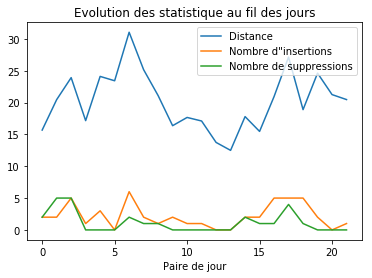

In [109]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML


display(df_diff_raw)

fig, ax = plt.subplots()
ax.plot(df_diff_raw['Dist'], label='Distance')
ax.plot(df_diff_raw['Nb insertions'], label='Nombre d"insertions')
ax.plot(df_diff_raw['Nb suppressions'], label='Nombre de suppressions')
ax.legend()
ax.set_xlabel("Paire de jour")
ax.set_title("Evolution des statistique au fil des jours")
plt.show()

In [108]:
df_diff_gt = get_diff_per_day('dataTest1924GT.csv')

---Jour 1 à 2---
Valeurs de la distance d'édition: 4.52842812290648
Insertions:
Apparition de LIBRAIRIE ARISTIDE QUILLET anc. nos 1 à 16.000
Apparition de - - - nouv. nos 16.001 à 20.000

Suppressions:
Disparition de ...
Disparition de ...

---Jour 2 à 3---
Valeurs de la distance d'édition: 7.2863532447328225
Insertions:
Apparition de Erreur
Apparition de MAIS AGNES Jouissance

Suppressions:
Disparition de CABLES TÉLÉGRAPHIQUES, 1re série. Parts §
Disparition de - 2e série. Parts Unités
Disparition de - - c. 5
Disparition de t.c.p. 25 .. .. .. .. .. .. .. .. c. 25
Disparition de - - nouvelles §

---Jour 3 à 4---
Valeurs de la distance d'édition: 12.212022550041379
Insertions:
Apparition de SUCRERIE ET RAFFINERIE DE BRESLES ordinaires §
Apparition de TABACS DE MACEDOINE ET D'ASIE-MINEURE
Apparition de - - Parts Unités
Apparition de - - - - c. 5
Apparition de t.c.par 25 .. .. .. .. .. .. .. .. c. 10

Suppressions:
Disparition de ...
Disparition de ...
Disparition de ...
Disparition de Er

,Jour,Dist,Insertions,Suppressions,Nb insertions,Nb suppressions
0,"(1, 2)",4.528428,Apparition de LIBRAIRIE ARISTIDE QUILLET anc. ...,Disparition de ...\nDisparition de ...\n,2,2
1,"(2, 3)",7.286353,Apparition de Erreur\nApparition de MAIS AGNES...,"Disparition de CABLES TÉLÉGRAPHIQUES, 1re séri...",2,5
2,"(3, 4)",12.212023,Apparition de SUCRERIE ET RAFFINERIE DE BRESLE...,Disparition de ...\nDisparition de ...\nDispar...,5,5
3,"(4, 5)",4.885325,Apparition de - - - c. 25\n,NaN,1,0
4,"(5, 6)",6.022758,Apparition de BELGE-CINEMA\nApparition de Erre...,NaN,3,0
5,"(6, 7)",4.556034,NaN,NaN,0,0
6,"(7, 8)",11.986081,Apparition de IMMOBILIERE ET HOTELIERE DE NORM...,"Disparition de - L.-P. FETTER, Berdiansk\nDisp...",6,2
7,"(8, 9)",6.820406,Apparition de BRASSERIE UNIVERSELLE\nApparitio...,Disparition de - - (nouvelles) §\n,2,1
8,"(9, 10)",4.352241,Apparition de NOUVELLES GALERIES PARISIENNES D...,Disparition de ...\n,1,1
9,"(10, 11)",4.304737,Apparition de CONSTRUCTIONS EDMOND COIGNET\nAp...,NaN,2,0


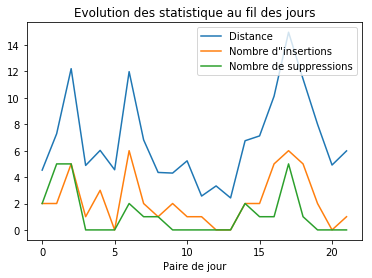

In [110]:
display(df_diff_gt)

fig, ax = plt.subplots()
ax.plot(df_diff_gt['Dist'], label='Distance')
ax.plot(df_diff_gt['Nb insertions'], label='Nombre d"insertions')
ax.plot(df_diff_gt['Nb suppressions'], label='Nombre de suppressions')
ax.legend()
ax.set_xlabel("Paire de jour")
ax.set_title("Evolution des statistique au fil des jours")
plt.show()

On observe que les distances mesurées sont beaucoup plus faibles pour GT que RAW. En effet si on part du principe que RAW est la sortie de l'OCR, comme ses prédictions ne sont pas parfaites, le résultat pour un meme mot va changer d'un jour a l'autre. Ce cout est donc du a des substitutions non nulles.

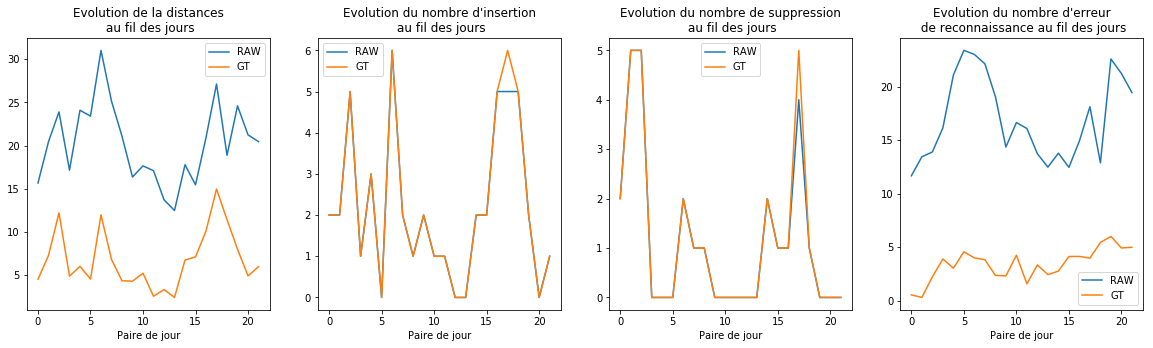

In [118]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].plot(df_diff_raw['Dist'], label='RAW')
ax[0].plot(df_diff_gt['Dist'], label='GT')
ax[0].set_title("Evolution de la distances\n au fil des jours")
ax[1].plot(df_diff_raw['Nb insertions'], label='RAW')
ax[1].plot(df_diff_gt['Nb insertions'], label='GT')
ax[1].set_title("Evolution du nombre d'insertion\n au fil des jours")
ax[2].plot(df_diff_raw['Nb suppressions'], label='RAW')
ax[2].plot(df_diff_gt['Nb suppressions'], label='GT')
ax[2].set_title("Evolution du nombre de suppression\n au fil des jours")
ax[3].plot(df_diff_raw['Dist'] - (df_diff_raw['Nb suppressions'] + df_diff_raw['Nb insertions']), label='RAW')
ax[3].plot(df_diff_gt['Dist'] - (df_diff_gt['Nb suppressions'] + df_diff_gt['Nb insertions']), label='GT')
ax[3].set_title("Evolution du nombre d'erreur\n de reconnaissance au fil des jours")
for i in range(4):
    ax[i].legend()
    ax[i].set_xlabel("Paire de jour")
plt.show()